In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df=pd.read_csv("diabetes.csv")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

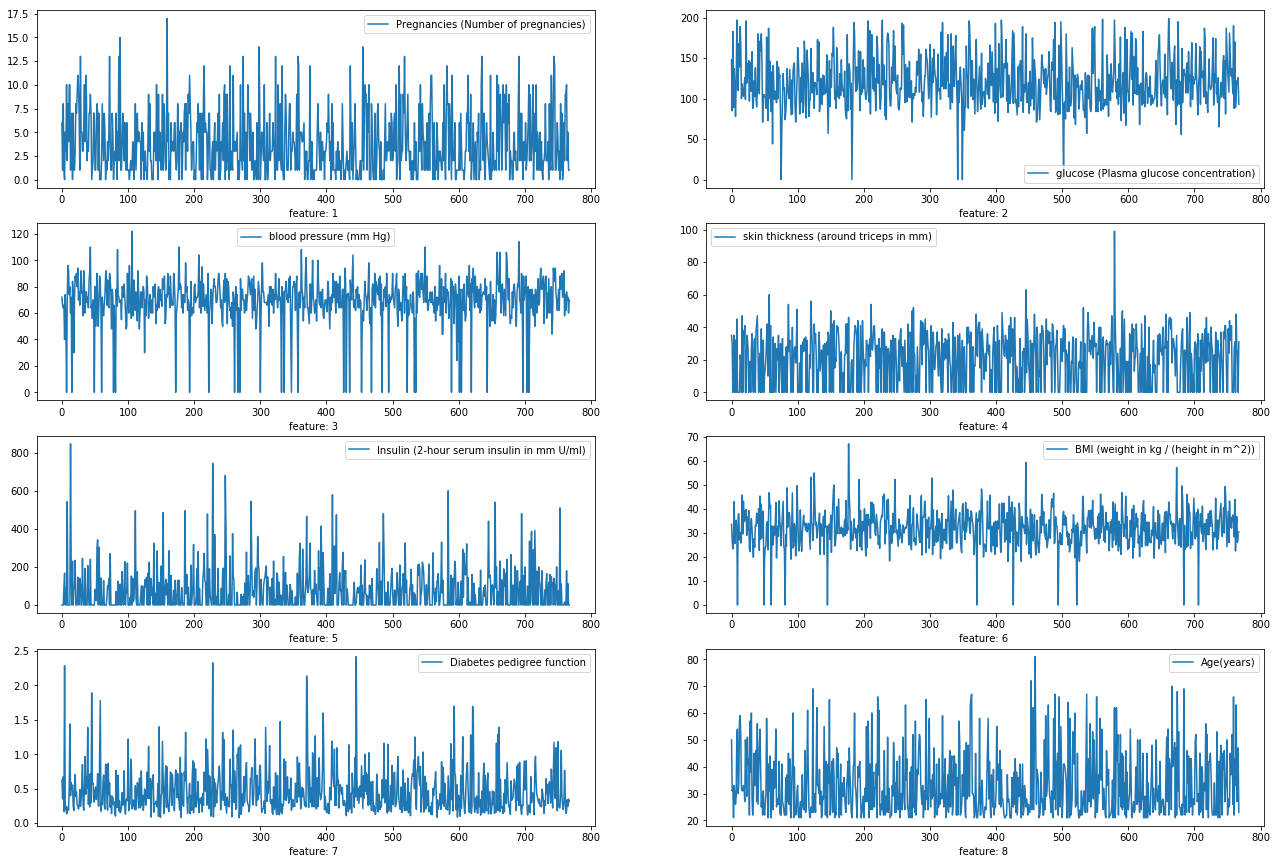

In [121]:
#Final input plot
plt.figure(figsize=(22,15))
for i in range(0,df.shape[1]-1):
    plt.subplot(4,2,i+1)
    plt.plot(df.iloc[:,i], label=l[i])
    plt.legend()
    plt.xlabel(f'feature: {i+1} ')

In [122]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
l=["Pregnancies (Number of pregnancies)","glucose (Plasma glucose concentration)","blood pressure (mm Hg)","skin thickness (around triceps in mm)",
  "Insulin (2-hour serum insulin in mm U/ml)", "BMI (weight in kg / (height in m^2))",
  "Diabetes pedigree function","Age(years)"]

In [123]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

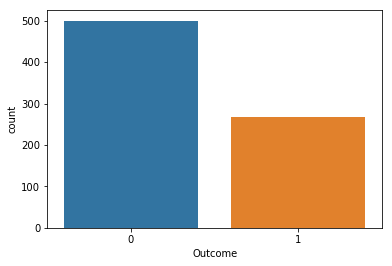

In [124]:
ss=sns.countplot(x="Outcome",data=df)

In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [126]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

In [127]:
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

#Scalling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# KNN

In [128]:
start_time = time.process_time()
neigh=KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train,y_train)
y_predict=neigh.predict(X_test)
end_time = time.process_time()
knn_time=end_time-start_time

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_predict)

from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_predict)
print(cm_knn,acc_knn)

[[75  3]
 [17 21]] 0.8275862068965517


In [88]:
print("accuracy",accuracy_score(y_test,y_predict))
print("precision",precision_score(y_test,y_predict))
print("recall",recall_score(y_test,y_predict))
f1=fbeta_score(y_test,y_predict,beta=1)
print("F1",f1)
print(classification_report(y_test,y_predict))

accuracy 0.8275862068965517
precision 0.875
recall 0.5526315789473685
F1 0.6774193548387096
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        78
           1       0.88      0.55      0.68        38

    accuracy                           0.83       116
   macro avg       0.85      0.76      0.78       116
weighted avg       0.83      0.83      0.82       116



Text(69.0, 0.5, 'Actual values')

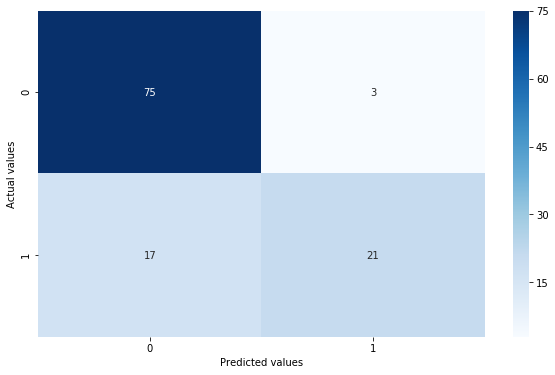

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_knn,cmap="Blues",annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
#Wrong label actually

In [130]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        78
           1       0.88      0.55      0.68        38

    accuracy                           0.83       116
   macro avg       0.85      0.76      0.78       116
weighted avg       0.83      0.83      0.82       116



In [131]:
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))

0.8275862068965517
0.875
0.5526315789473685


Working with balanced data, i.e., 268 points train and test

# SVM

In [134]:
#Change string of kernel based on requirements

In [135]:
start_time = time.process_time()
svc=SVC(kernel='poly', degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
end_time = time.process_time()
svm_time=end_time-start_time

cm_svc = confusion_matrix(y_test, y_predict)
acc_svc=accuracy_score(y_test,y_predict)
print(cm_svc,acc_svc)

[[74  4]
 [26 12]] 0.7413793103448276


Text(69.0, 0.5, 'Actual values')

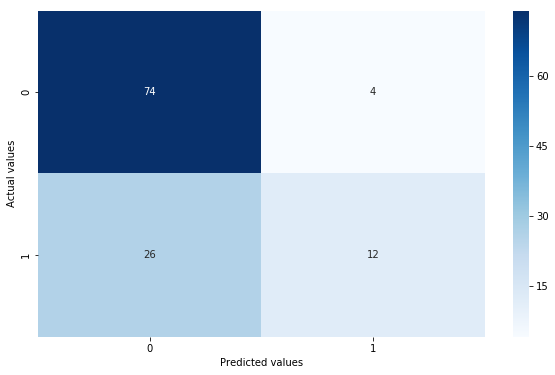

In [136]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_svc,cmap="Blues",annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
#Wrong label actually

In [137]:
print("accuracy",accuracy_score(y_test,y_predict))
print("precision",precision_score(y_test,y_predict))
print("recall",recall_score(y_test,y_predict))
f1=fbeta_score(y_test,y_predict,beta=1)
print("F1",f1)
print(classification_report(y_test,y_predict))

accuracy 0.7413793103448276
precision 0.75
recall 0.3157894736842105
F1 0.44444444444444436
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        78
           1       0.75      0.32      0.44        38

    accuracy                           0.74       116
   macro avg       0.74      0.63      0.64       116
weighted avg       0.74      0.74      0.70       116



No. of support vectors

In [142]:
len(svc.support_vectors_)

361

In [140]:
svc.n_support_

array([185, 176])

In [141]:
svc.support_vectors_

array([[-0.54921808, -0.3978825 , -0.35995979, ..., -0.85834839,
         1.26393096, -0.95875201],
       [-0.84249424,  2.29516196, -0.97367202, ..., -0.78239248,
         0.57614012, -0.79199029],
       [ 0.03733424, -0.27115099,  0.45832318, ...,  0.92661552,
        -0.69901193,  0.37534176],
       ...,
       [ 1.21043887,  1.0595298 ,  0.45832318, ...,  0.04046322,
        -0.06904421,  0.95900778],
       [ 1.21043887,  0.14072639,  1.37889151, ..., -4.06115598,
        -0.71118521,  1.70943552],
       [ 0.91716271,  1.21794418, -0.15538905, ..., -0.21272315,
        -0.25164355,  0.20858004]])